# Introduction
This Exploratory Data Analysis dives into the data to inform models and approaches for clustering maritime vessels.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('set1.csv')

# 1. Data Cleaning and Preprocessing
- **Missing Values:** Check for and handle missing data in features like latitude, longitude, speed, and course.
- **Data Types:** Ensure that each column is of the correct data type (e.g., timestamps as datetime objects, latitude and longitude as floats).
- **Outliers:** Identify and handle outliers, especially in speed and course data, as these could represent errors or unusual vessel behavior.

## Missing Values

In [7]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
OBJECT_ID             0
VID                   0
SEQUENCE_DTTM         0
LAT                   0
LON                   0
SPEED_OVER_GROUND     0
COURSE_OVER_GROUND    0
dtype: int64


## Unique Values

In [28]:
# Iterate through each column and print unique values
print("Unique values:")
print(df.nunique())

Unique values:
OBJECT_ID             13714
VID                      20
SEQUENCE_DTTM          9112
LAT                    4668
LON                    5021
SPEED_OVER_GROUND       246
COURSE_OVER_GROUND     2928
Hour                      4
STANDARDIZED_TIME      9112
dtype: int64


## Data Types

In [6]:
print("Data Types:")
print(df.dtypes)

Data Types:
OBJECT_ID               int64
VID                     int64
SEQUENCE_DTTM          object
LAT                   float64
LON                   float64
SPEED_OVER_GROUND       int64
COURSE_OVER_GROUND      int64
dtype: object


## Outliers

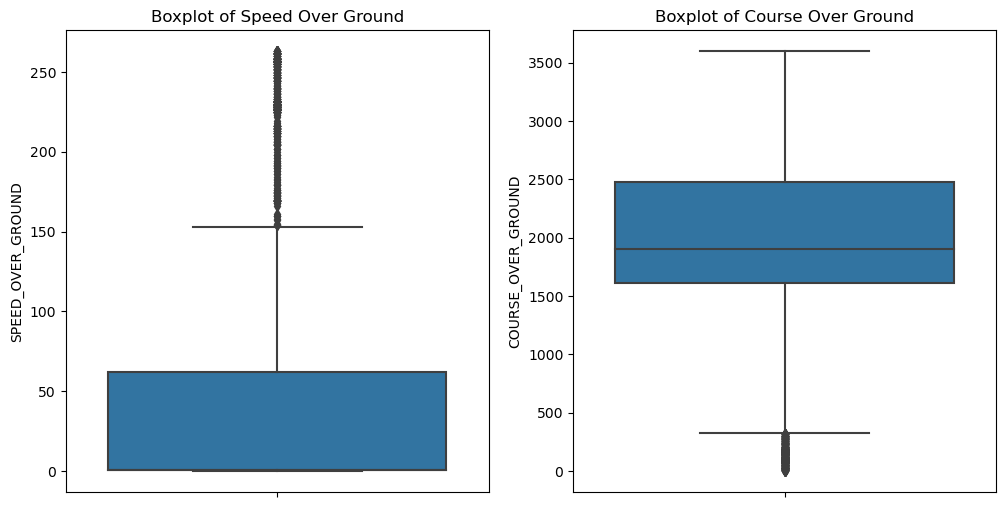

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['SPEED_OVER_GROUND'])
plt.title('Boxplot of Speed Over Ground')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['COURSE_OVER_GROUND'])
plt.title('Boxplot of Course Over Ground')

plt.show()

# 2. Univariate Analysis
- **Distribution of Each Feature:** Analyze the distribution of each variable (latitude, longitude, speed, course) using histograms or density plots to understand their range and common values.
- **Temporal Patterns:** Since data includes timestamps, look for patterns over time (e.g., peak hours for vessel movements).

## Distribution of Each Feature

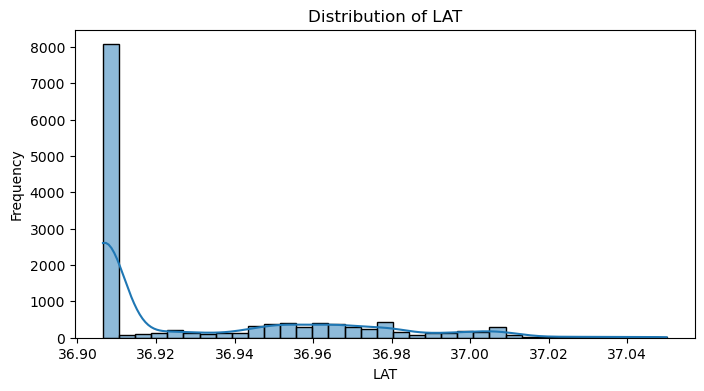

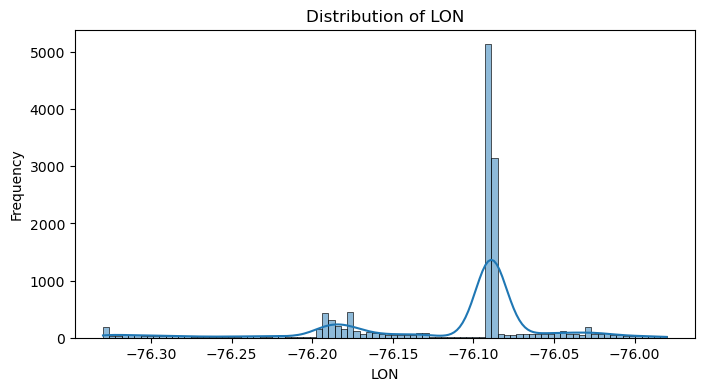

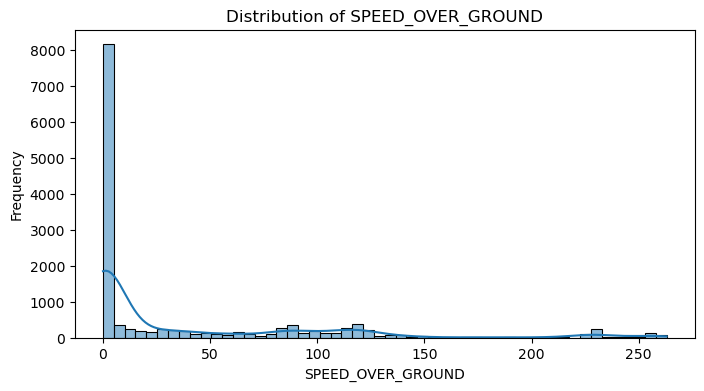

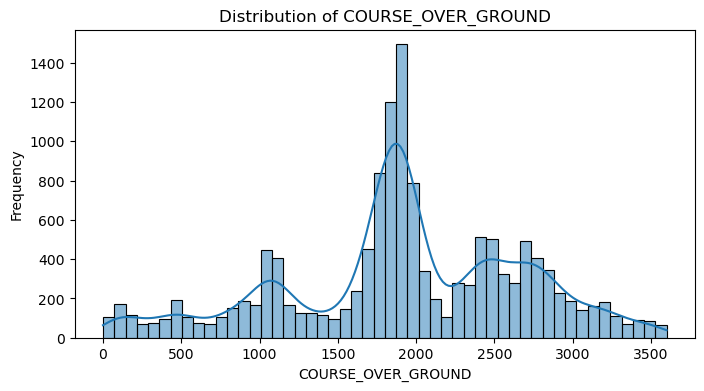

In [18]:
df['SEQUENCE_DTTM'] = pd.to_datetime(df['SEQUENCE_DTTM'], format='%H:%M:%S')  # Adjust format as needed

# Distribution of Each Feature
# List of features for distribution analysis
features = ['LAT', 'LON', 'SPEED_OVER_GROUND', 'COURSE_OVER_GROUND']

# Plotting histograms/density plots for each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Temporal Patterns

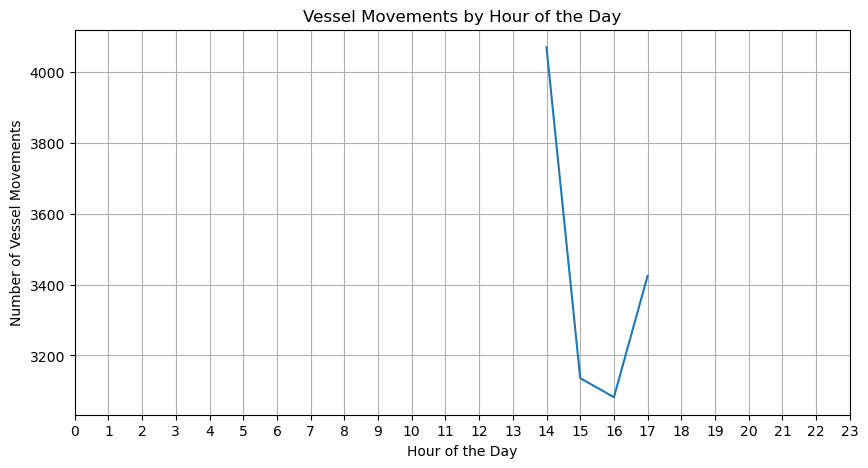

In [19]:
# Temporal Patterns
# Extracting hour from the timestamp for analysis
df['Hour'] = df['SEQUENCE_DTTM'].dt.hour

# Counting occurrences per hour to find peak hours for vessel movements
hourly_counts = df['Hour'].value_counts().sort_index()

# Plotting the temporal pattern
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Vessel Movements by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vessel Movements')
plt.xticks(range(0, 24))  # Setting x-axis ticks for each hour
plt.grid(True)
plt.show()

# 3. Bivariate and Multivariate Analysis
- **Correlation Analysis:** Check for correlations between continuous variables (like speed and course) using scatter plots or correlation matrices.
- **Geospatial Analysis:** Plot the latitude and longitude on a map to visualize the trajectories and identify common routes or areas of high activity.
- **Temporal and Spatial Trends:** Investigate how vessel movements change over time and in different geographic locations.

## Correlation Analysis

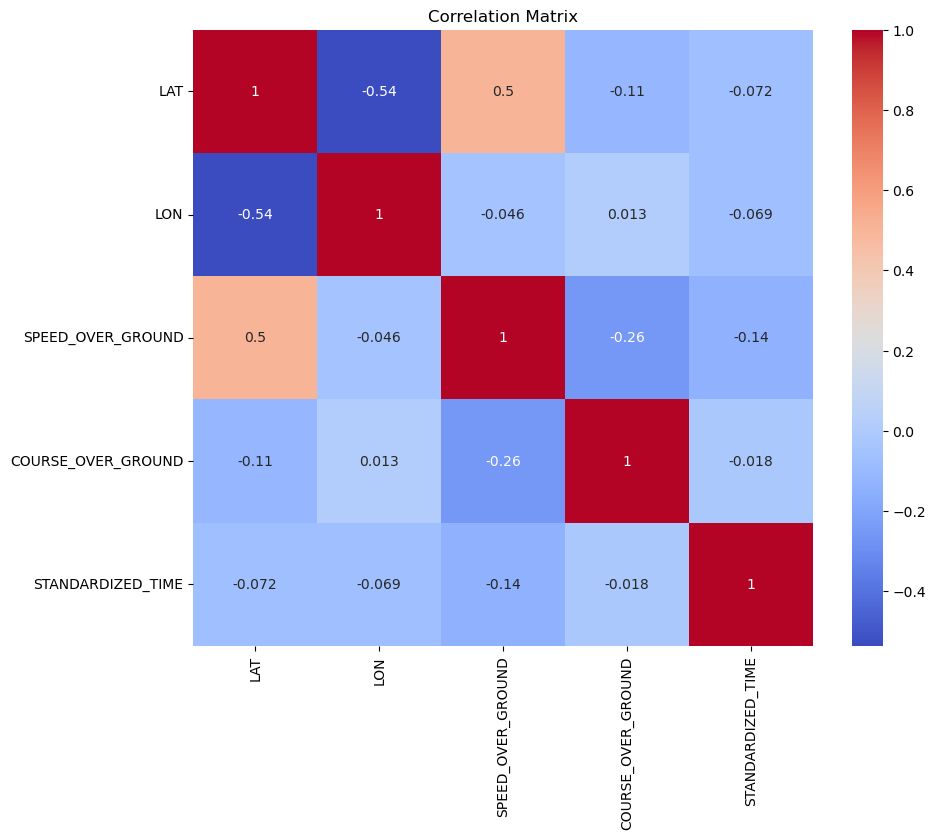

In [25]:
# Convert SEQUENCE_DTTM to datetime object
df['SEQUENCE_DTTM'] = pd.to_datetime(df['SEQUENCE_DTTM'], format='%H:%M:%S')  # Adjust the format if needed

# Convert time to seconds since midnight
df['STANDARDIZED_TIME'] = df['SEQUENCE_DTTM'].dt.hour * 3600 + df['SEQUENCE_DTTM'].dt.minute * 60 + df['SEQUENCE_DTTM'].dt.second

# Now include STANDARDIZED_TIME in your correlation analysis
continuous_features = ['LAT', 'LON', 'SPEED_OVER_GROUND', 'COURSE_OVER_GROUND', 'STANDARDIZED_TIME']

# Correlation matrix
corr_matrix = df[continuous_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Geospatial Analysis

In [24]:
import folium

ModuleNotFoundError: No module named 'folium'

In [ ]:
import folium

# Sample a subset of data to avoid overloading the map
sampled_df = df.sample(n=1000, random_state=1)

# Create a map centered around the average coordinates
map = folium.Map(location=[sampled_df['Latitude'].mean(), sampled_df['Longitude'].mean()], zoom_start=6)

# Add points to the map
for idx, row in sampled_df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=1,
                        color='blue',
                        fill=True).add_to(map)

# Display the map
map


## Temporal and Spatial Trends

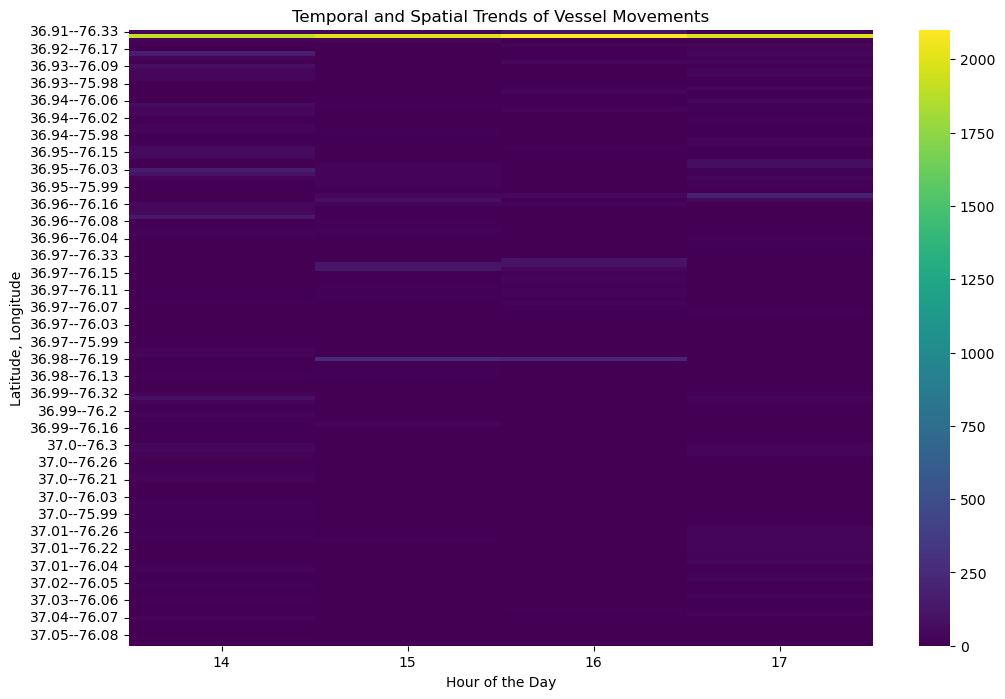

In [31]:
# Aggregate data by hour and location (rounding latitude and longitude for simplicity)
grouped_df = df.groupby([df['LAT'].round(2), df['LON'].round(2), 'Hour']).size().reset_index(name='Count')

# Pivot table for heatmap
pivot_table = grouped_df.pivot_table(values='Count', index=['LAT', 'LON'], columns='Hour', fill_value=0)

# Heatmap of vessel movements by hour and location
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Temporal and Spatial Trends of Vessel Movements')
plt.ylabel('Latitude, Longitude')
plt.xlabel('Hour of the Day')
plt.show()

# 4. Cluster Analysis
This section breaks down observations by each actual cluster to analyze potential trends.

## Summary Statistics by VID

In [32]:
# Group by VID and calculate summary statistics
grouped_df = df.groupby('VID').agg(['mean', 'std', 'min', 'max'])
print(grouped_df)

           OBJECT_ID                                   LAT            \
                mean          std    min    max       mean       std   
VID                                                                    
100001   4257.149742  1496.408368   1247   6768  36.978362  0.020090   
100002  11812.299213  1118.833217   9928  13658  37.007071  0.016876   
100003   3392.162162   813.434980   1803   4536  36.980213  0.021479   
100004   6997.474937  3433.369977     14  13710  36.964108  0.013769   
100005   7295.839767  3747.977727      6  13705  36.906803  0.000030   
100006   7215.289555  3729.515606      7  13706  36.906875  0.000010   
100007   6648.795181  3808.688802     15  13709  36.908988  0.005843   
100008   7118.875287  3744.340583      1  13703  36.906841  0.000011   
100009  11957.004950  1008.162269  10251  13713  37.010932  0.012838   
100010   8954.293763  1932.042022    211  11384  36.952615  0.018261   
100011   1427.808743   694.717961    242   2606  37.016971  0.01

C:\Users\Eric Elizes\AppData\Local\Temp\ipykernel_39352\3225917230.py:2: FutureWarning: ['SEQUENCE_DTTM'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.groupby('VID').agg(['mean', 'std', 'min', 'max'])


## Time Series Analysis for Each VID

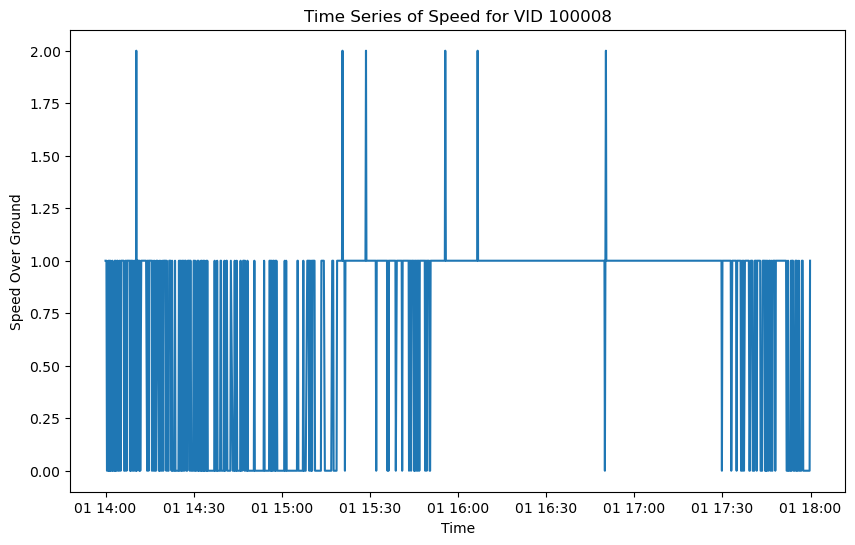

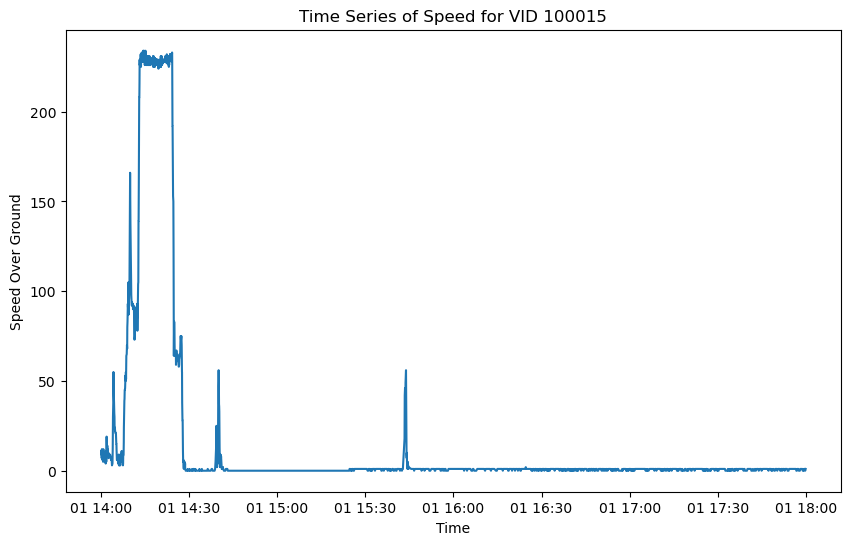

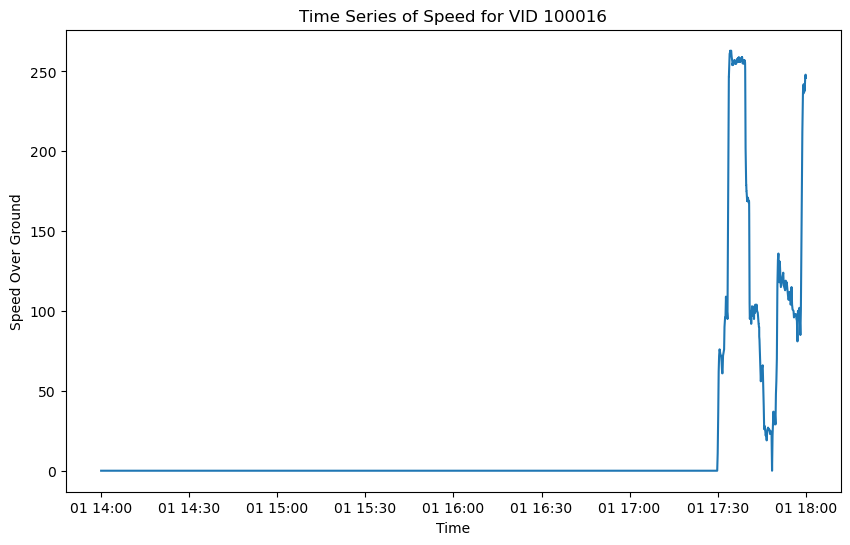

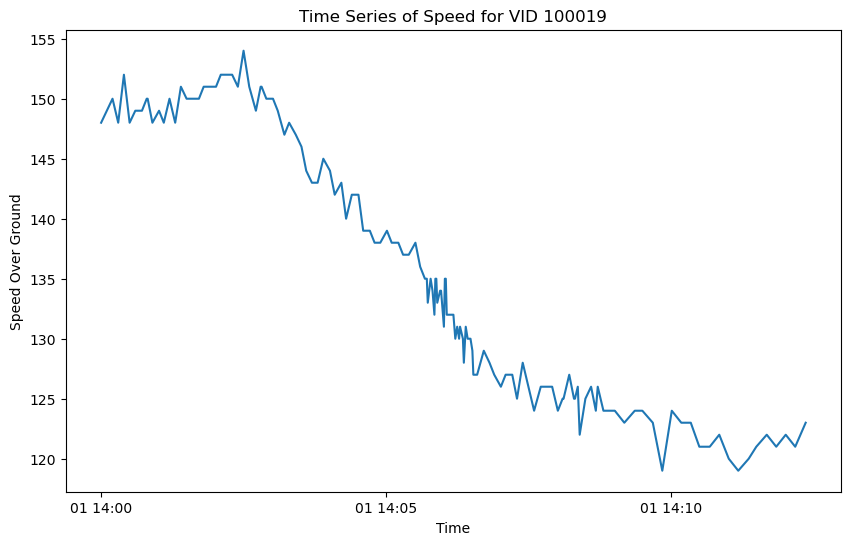

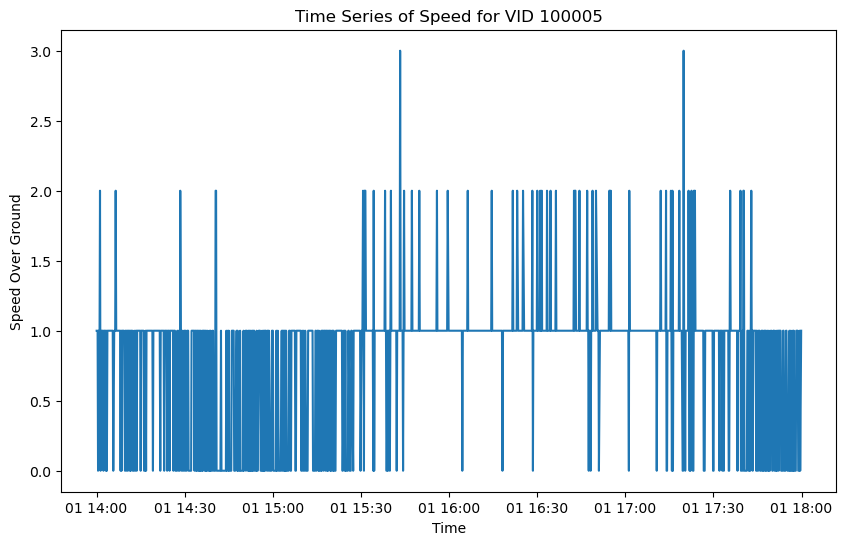

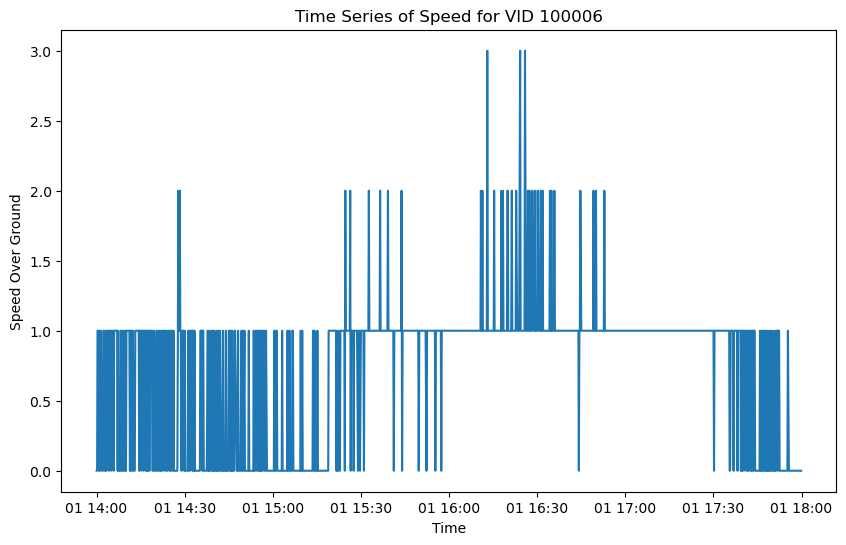

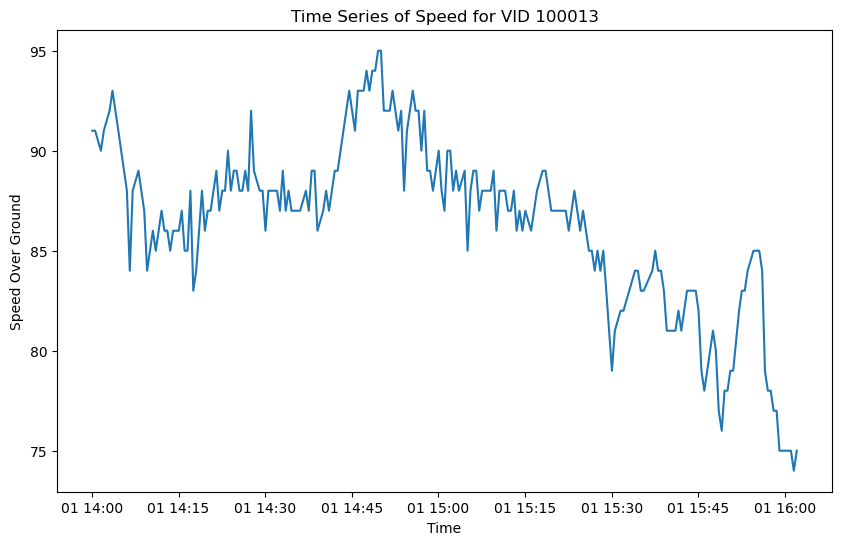

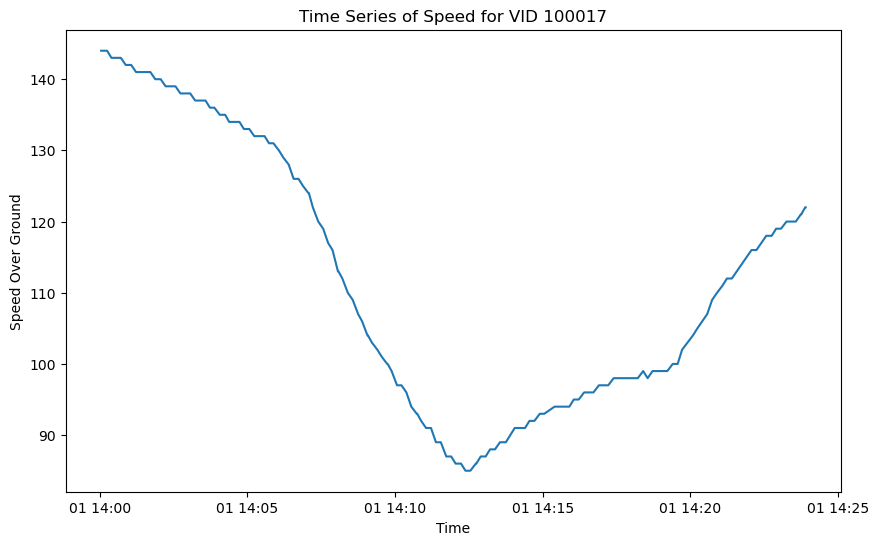

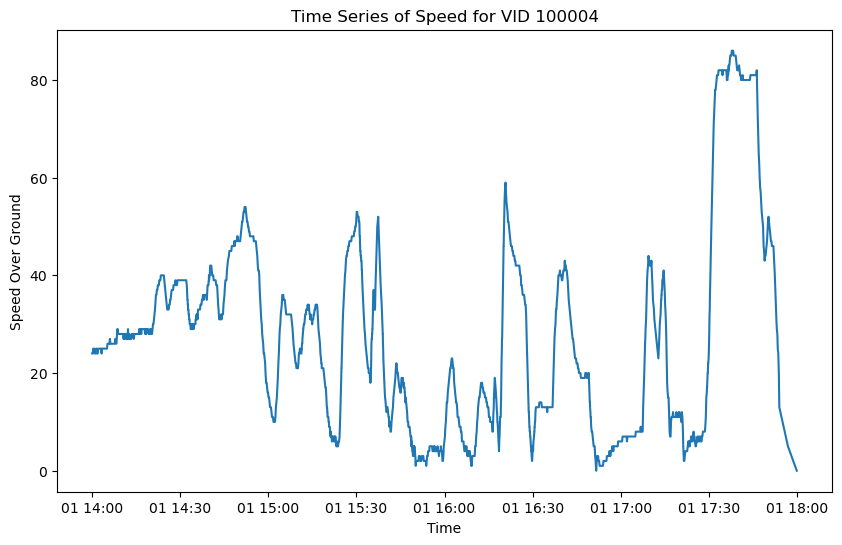

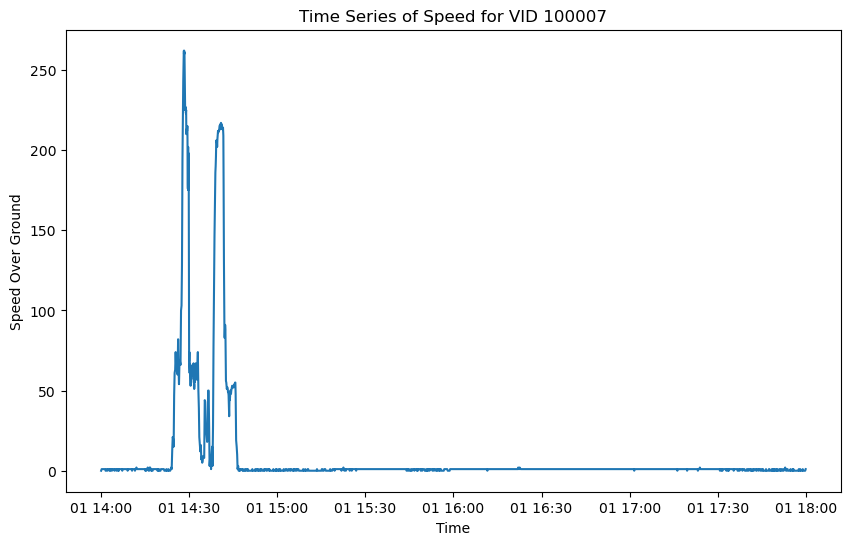

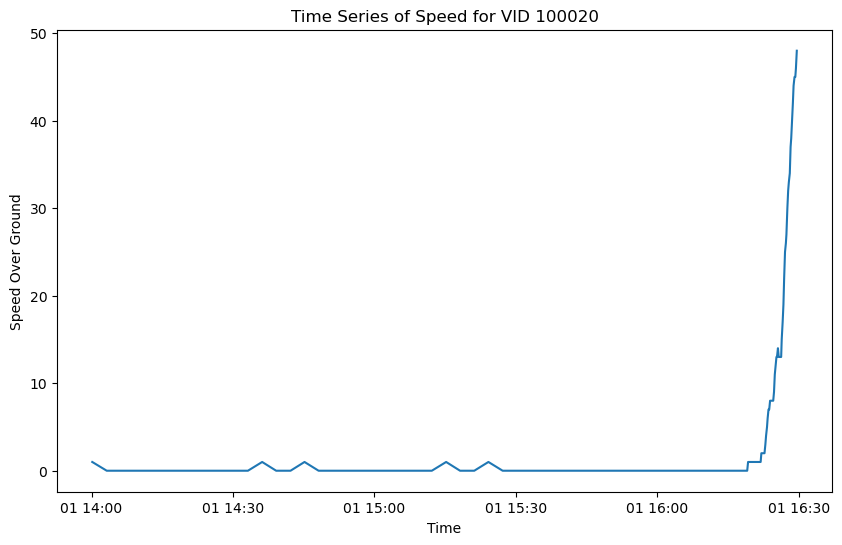

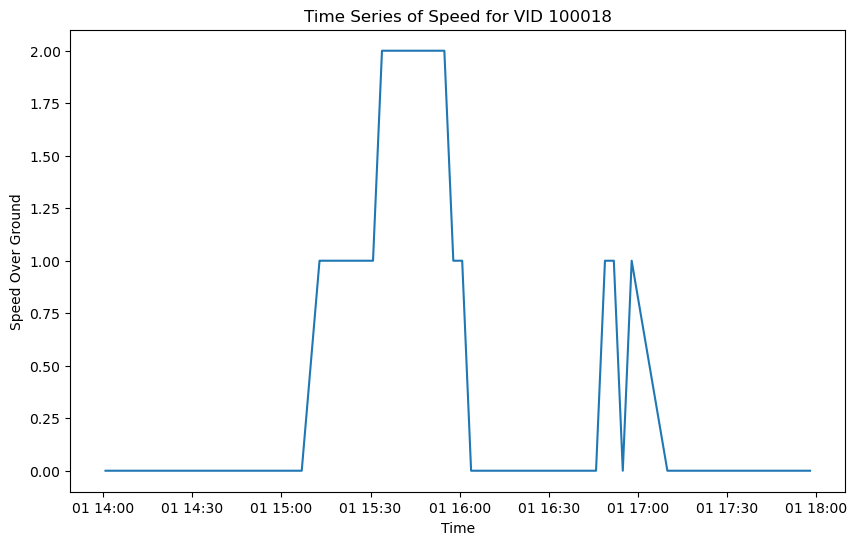

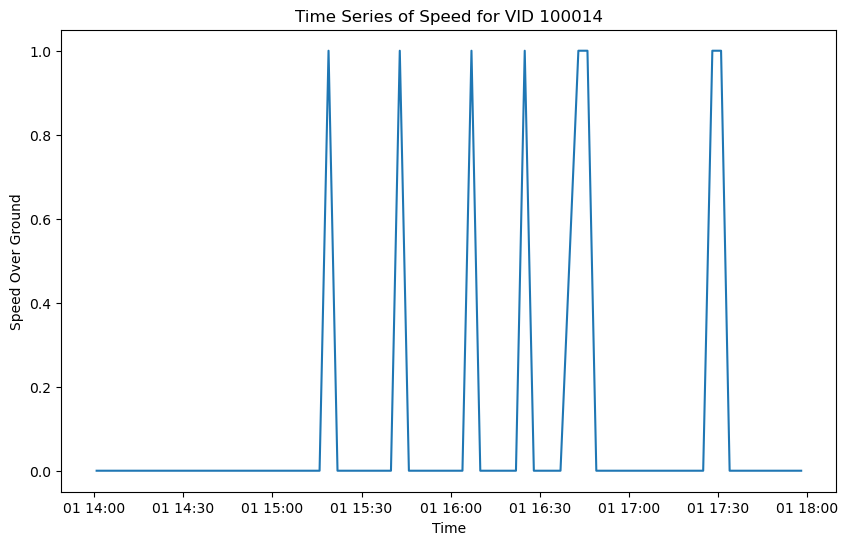

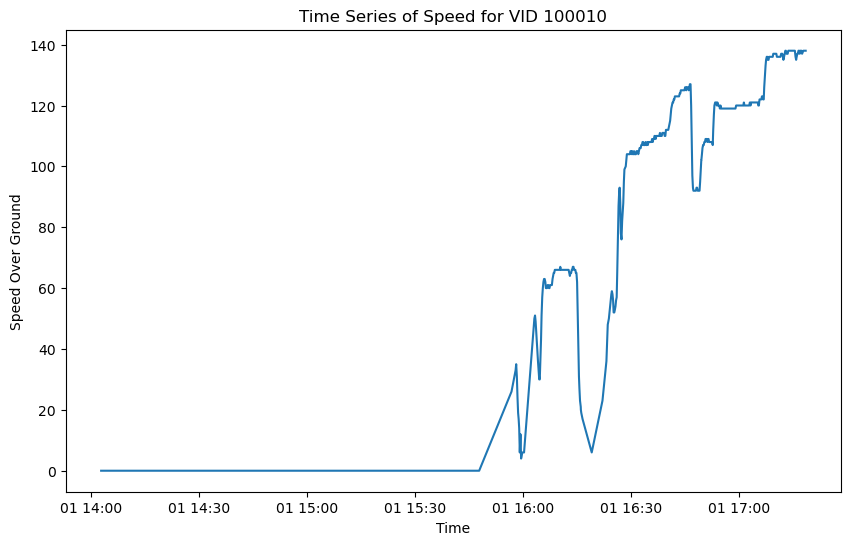

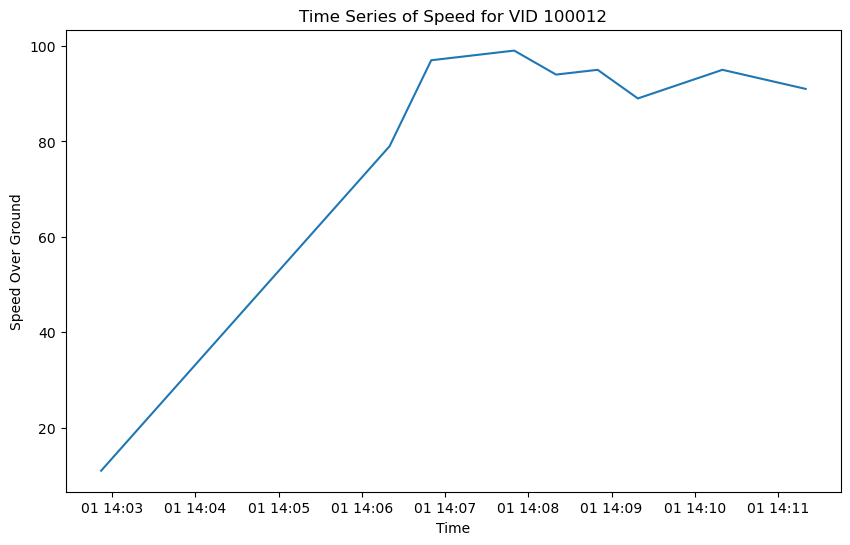

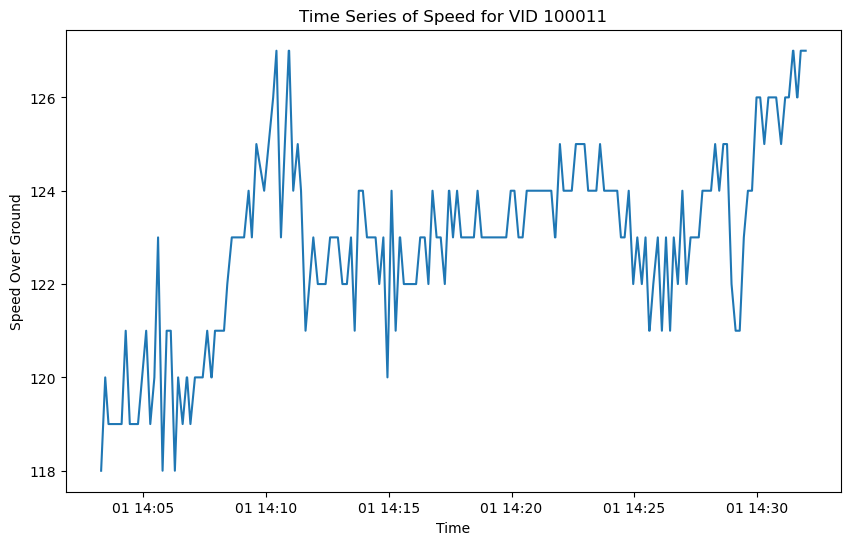

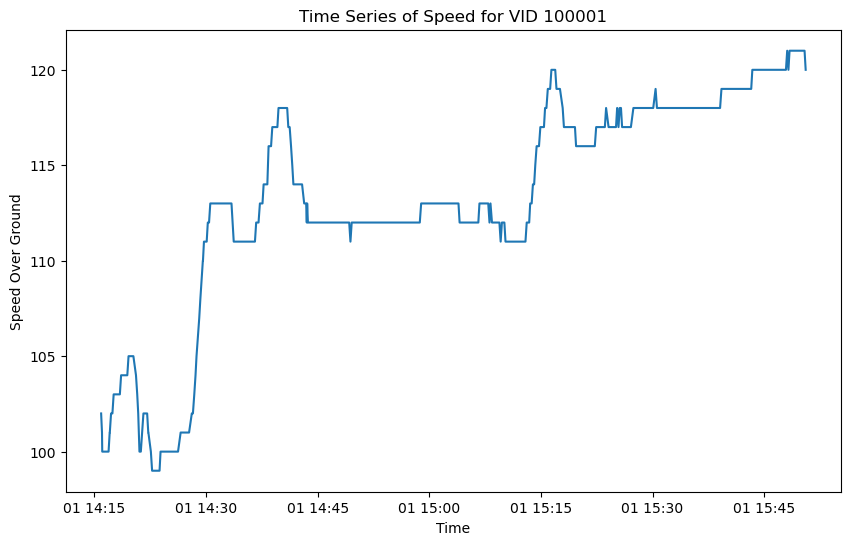

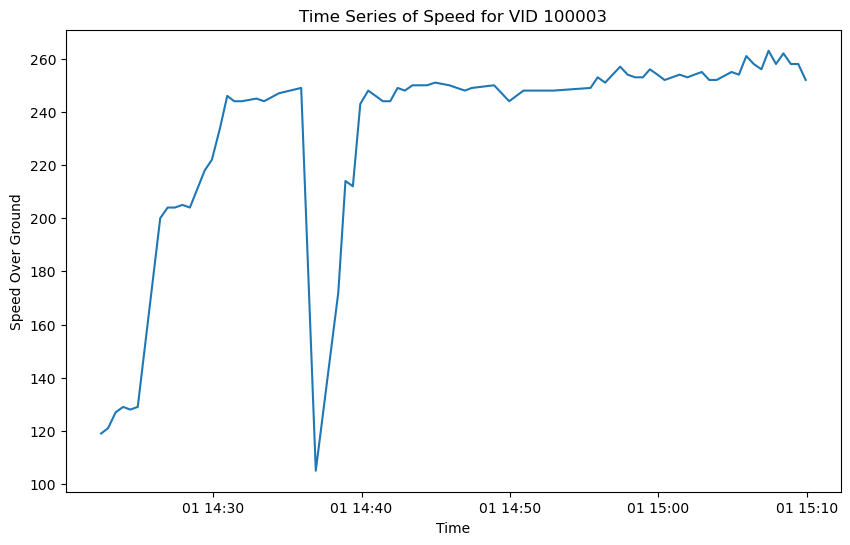

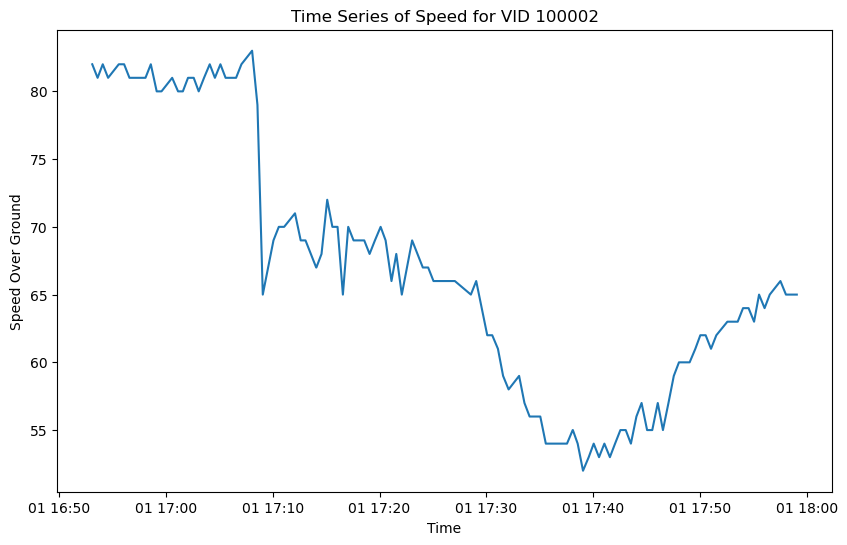

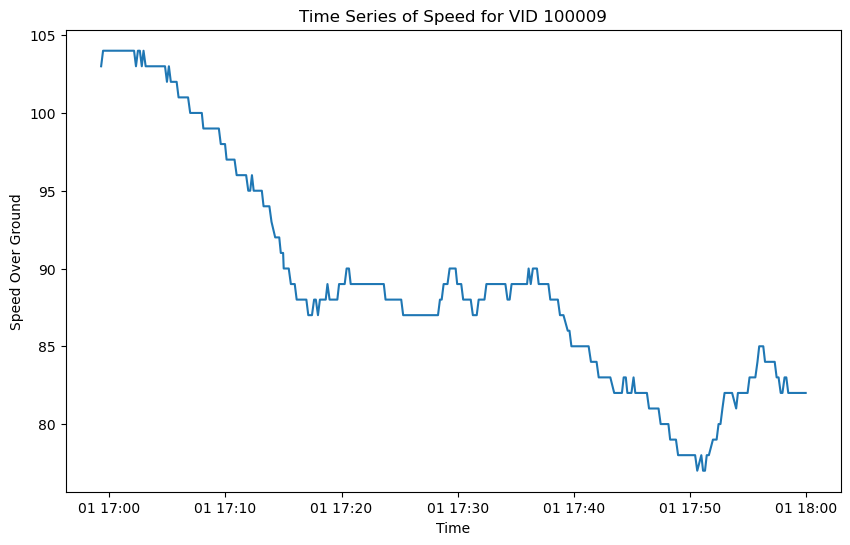

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert SEQUENCE_DTTM to datetime object
df['SEQUENCE_DTTM'] = pd.to_datetime(df['SEQUENCE_DTTM'], format='%H:%M:%S')

# Select a subset of VIDs to plot
sample_vids = df['VID'].unique() # Adjust the number as needed

for vid in sample_vids:
    sample_df = df[df['VID'] == vid]
    
    plt.figure(figsize=(10, 6))
    plt.plot(sample_df['SEQUENCE_DTTM'], sample_df['SPEED_OVER_GROUND'])
    plt.title(f'Time Series of Speed for VID {vid}')
    plt.xlabel('Time')
    plt.ylabel('Speed Over Ground')
    plt.show()
